In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-255) to (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input (28x28x1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28, 1)
Testing shape: (10000, 28, 28, 1)


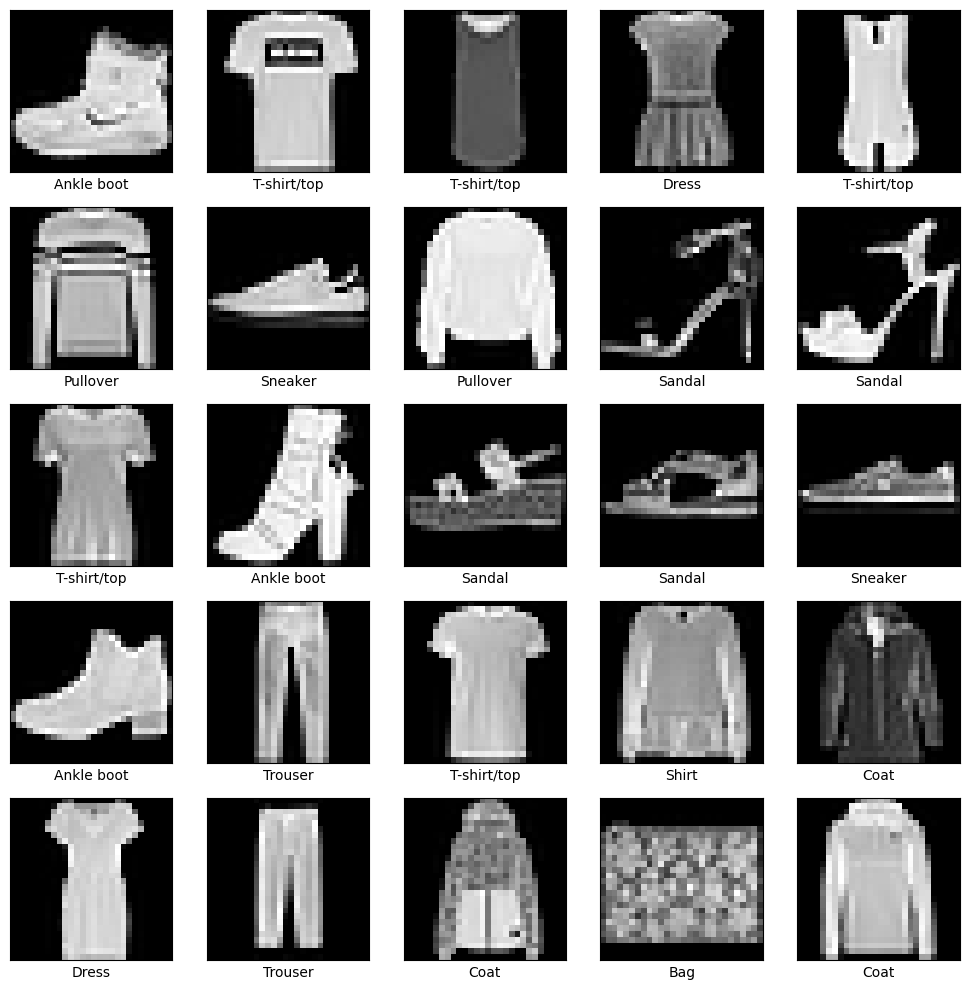

In [ ]:
import matplotlib.pyplot as plt

# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_cnn_model(start_filters):
    model = Sequential([
        Conv2D(start_filters, (3, 3), activation='relu', strides=(1, 1), padding='VALID', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(start_filters * 2, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
model_64 = create_cnn_model(64)
model_128 = create_cnn_model(128)
model_256 = create_cnn_model(256)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_64.summary()
model_128.summary()
model_256.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,770 (1.85 MB)

 Trainable params: 485,642 (1.85 MB)

 Non-trainable params: 128 (512.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,117,578 (4.26 MB)

 Trainable params: 1,117,322 (4.26 MB)

 Non-trainable params: 256 (1.00 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,823,562 (10.77 MB)

 Trainable params: 2,823,050 (10.77 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
import time

def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=128):
    start_time = time.time()

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=2)

    end_time = time.time()
    duration = end_time - start_time

    print(f"Training time: {duration:.2f} seconds")
    return history, duration


In [ ]:
history_64, time_64 = train_model(model_64, x_train, y_train, x_test, y_test)

Epoch 1/10
469/469 - 147s - 313ms/step - accuracy: 0.8381 - loss: 0.4545 - val_accuracy: 0.8785 - val_loss: 0.5826
Epoch 2/10
469/469 - 143s - 306ms/step - accuracy: 0.8922 - loss: 0.2972 - val_accuracy: 0.8659 - val_loss: 0.3553
Epoch 3/10
469/469 - 202s - 431ms/step - accuracy: 0.9071 - loss: 0.2527 - val_accuracy: 0.9018 - val_loss: 0.2677
Epoch 4/10
469/469 - 202s - 430ms/step - accuracy: 0.9175 - loss: 0.2225 - val_accuracy: 0.9103 - val_loss: 0.2540
Epoch 5/10
469/469 - 205s - 438ms/step - accuracy: 0.9244 - loss: 0.2007 - val_accuracy: 0.8840 - val_loss: 0.3510
Epoch 6/10
469/469 - 199s - 425ms/step - accuracy: 0.9343 - loss: 0.1789 - val_accuracy: 0.9037 - val_loss: 0.2669
Epoch 7/10
469/469 - 201s - 429ms/step - accuracy: 0.9384 - loss: 0.1653 - val_accuracy: 0.9098 - val_loss: 0.2460
Epoch 8/10
469/469 - 206s - 439ms/step - accuracy: 0.9436 - loss: 0.1488 - val_accuracy: 0.9067 - val_loss: 0.2714
Epoch 9/10
469/469 - 198s - 421ms/step - accuracy: 0.9479 - loss: 0.1351 - val_a

In [ ]:
history_128, time_128 = train_model(model_128, x_train, y_train, x_test, y_test)

Epoch 1/10
469/469 - 450s - 959ms/step - accuracy: 0.8415 - loss: 0.4452 - val_accuracy: 0.8830 - val_loss: 0.6811
Epoch 2/10
469/469 - 505s - 1s/step - accuracy: 0.8951 - loss: 0.2898 - val_accuracy: 0.8938 - val_loss: 0.2883
Epoch 3/10
469/469 - 450s - 960ms/step - accuracy: 0.9115 - loss: 0.2428 - val_accuracy: 0.8985 - val_loss: 0.2629
Epoch 4/10
469/469 - 504s - 1s/step - accuracy: 0.9207 - loss: 0.2146 - val_accuracy: 0.9099 - val_loss: 0.2578
Epoch 5/10
469/469 - 496s - 1s/step - accuracy: 0.9295 - loss: 0.1904 - val_accuracy: 0.9093 - val_loss: 0.2749
Epoch 6/10
469/469 - 507s - 1s/step - accuracy: 0.9352 - loss: 0.1724 - val_accuracy: 0.9106 - val_loss: 0.2527
Epoch 7/10
469/469 - 501s - 1s/step - accuracy: 0.9426 - loss: 0.1522 - val_accuracy: 0.9144 - val_loss: 0.2552
Epoch 8/10
469/469 - 437s - 932ms/step - accuracy: 0.9474 - loss: 0.1362 - val_accuracy: 0.9150 - val_loss: 0.2625
Epoch 9/10
469/469 - 443s - 945ms/step - accuracy: 0.9523 - loss: 0.1224 - val_accuracy: 0.8878

In [ ]:
# reaching model with 64 filters to 96% accuracy

def create_cnn_model_modified(start_filters):
    model = Sequential([
        Conv2D(start_filters, (3, 3), activation='relu', strides=(1, 1), padding='VALID', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(start_filters * 2, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
model_64_modofied = create_cnn_model_modified(64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_64_modofied.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,778 (3.42 MB)

 Trainable params: 896,650 (3.42 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
history_64, time_64 = train_model(model_64_modofied, x_train, y_train, x_test, y_test)

Epoch 1/10
469/469 - 152s - 325ms/step - accuracy: 0.8510 - loss: 0.4084 - val_accuracy: 0.8795 - val_loss: 0.6487
Epoch 2/10
469/469 - 202s - 430ms/step - accuracy: 0.9007 - loss: 0.2699 - val_accuracy: 0.9000 - val_loss: 0.2690
Epoch 3/10
469/469 - 207s - 440ms/step - accuracy: 0.9169 - loss: 0.2252 - val_accuracy: 0.9031 - val_loss: 0.2519
Epoch 4/10
469/469 - 197s - 420ms/step - accuracy: 0.9267 - loss: 0.1966 - val_accuracy: 0.9083 - val_loss: 0.2442
Epoch 5/10
469/469 - 200s - 427ms/step - accuracy: 0.9365 - loss: 0.1712 - val_accuracy: 0.9112 - val_loss: 0.2590
Epoch 6/10
469/469 - 148s - 316ms/step - accuracy: 0.9434 - loss: 0.1515 - val_accuracy: 0.9146 - val_loss: 0.2417
Epoch 7/10
469/469 - 154s - 328ms/step - accuracy: 0.9482 - loss: 0.1361 - val_accuracy: 0.8988 - val_loss: 0.3007
Epoch 8/10
469/469 - 149s - 318ms/step - accuracy: 0.9551 - loss: 0.1184 - val_accuracy: 0.9178 - val_loss: 0.2572
Epoch 9/10
469/469 - 204s - 434ms/step - accuracy: 0.9602 - loss: 0.1059 - val_a

**The CNN neural network with 64 filters reached 96% accuracy**

In [ ]:
test_loss, test_acc = model_64.evaluate(x_test, y_test, verbose=0)
print(f"Model 64 Filters - Test Accuracy: {test_acc * 100:.2f}%")

Model 64 Filters - Test Accuracy: 91.00%


In [ ]:
test_loss, test_acc = model_128.evaluate(x_test, y_test, verbose=0)
print(f"Model 128 Filters - Test Accuracy: {test_acc * 100:.2f}%")

Model 128 Filters - Test Accuracy: 91.17%


**Using GPU for the architecture with 128 filters**

In [ ]:
history_128, time_128 = train_model(model_128, x_train, y_train, x_test, y_test)

Epoch 1/10
469/469 - 15s - 32ms/step - accuracy: 0.8430 - loss: 0.4503 - val_accuracy: 0.8783 - val_loss: 0.7444
Epoch 2/10
469/469 - 13s - 28ms/step - accuracy: 0.8970 - loss: 0.2868 - val_accuracy: 0.8966 - val_loss: 0.2789
Epoch 3/10
469/469 - 10s - 22ms/step - accuracy: 0.9093 - loss: 0.2465 - val_accuracy: 0.9013 - val_loss: 0.2609
Epoch 4/10
469/469 - 6s - 12ms/step - accuracy: 0.9204 - loss: 0.2158 - val_accuracy: 0.9070 - val_loss: 0.2513
Epoch 5/10
469/469 - 6s - 12ms/step - accuracy: 0.9286 - loss: 0.1901 - val_accuracy: 0.9056 - val_loss: 0.2613
Epoch 6/10
469/469 - 6s - 12ms/step - accuracy: 0.9346 - loss: 0.1736 - val_accuracy: 0.9089 - val_loss: 0.2603
Epoch 7/10
469/469 - 10s - 22ms/step - accuracy: 0.9427 - loss: 0.1518 - val_accuracy: 0.9093 - val_loss: 0.2706
Epoch 8/10
469/469 - 6s - 12ms/step - accuracy: 0.9472 - loss: 0.1386 - val_accuracy: 0.9104 - val_loss: 0.2768
Epoch 9/10
469/469 - 10s - 21ms/step - accuracy: 0.9521 - loss: 0.1260 - val_accuracy: 0.9111 - val_

In [ ]:
# Evaluate model on test data
test_loss, test_acc = model_128.evaluate(x_test, y_test, verbose=0)

# Print both loss and accuracy
print(f"Model 128 Filters - Test Loss: {test_loss* 100:.2f}%")
print(f"Model 128 Filters - Test Accuracy: {test_acc * 100:.2f}%")


Model 128 Filters - Test Loss: 31.18%
Model 128 Filters - Test Accuracy: 90.80%


**GPU is faster than CPU, as GPU took Training time: 92.42 seconds while CPU took Training time: 4796.20 seconds for architecture 2**

# **Bonus: Test your model on the CIFAR10 dataset**

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)



In [ ]:
def create_cnn_model_cifar(start_filters):
    model = Sequential([
        Conv2D(start_filters, (3, 3), activation='relu', strides=(1, 1), padding='VALID', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        BatchNormalization(),

        Conv2D(start_filters * 2, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        BatchNormalization(),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
cifar_model = create_cnn_model_cifar(64)

In [ ]:
history_64, time_64 = train_model(cifar_model, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)


Epoch 1/10
391/391 - 10s - 27ms/step - accuracy: 0.5513 - loss: 1.4104 - val_accuracy: 0.1076 - val_loss: 7.5255
Epoch 2/10
391/391 - 3s - 8ms/step - accuracy: 0.7157 - loss: 0.8214 - val_accuracy: 0.6801 - val_loss: 0.9232
Epoch 3/10
391/391 - 5s - 14ms/step - accuracy: 0.7878 - loss: 0.6086 - val_accuracy: 0.6666 - val_loss: 1.1685
Epoch 4/10
391/391 - 3s - 8ms/step - accuracy: 0.8422 - loss: 0.4495 - val_accuracy: 0.7132 - val_loss: 0.9307
Epoch 5/10
391/391 - 3s - 8ms/step - accuracy: 0.8878 - loss: 0.3228 - val_accuracy: 0.7262 - val_loss: 0.9313
Epoch 6/10
391/391 - 3s - 8ms/step - accuracy: 0.9119 - loss: 0.2499 - val_accuracy: 0.7123 - val_loss: 1.0284
Epoch 7/10
391/391 - 5s - 14ms/step - accuracy: 0.9312 - loss: 0.1975 - val_accuracy: 0.6746 - val_loss: 1.3207
Epoch 8/10
391/391 - 3s - 8ms/step - accuracy: 0.9409 - loss: 0.1682 - val_accuracy: 0.6428 - val_loss: 1.5254
Epoch 9/10
391/391 - 6s - 15ms/step - accuracy: 0.9495 - loss: 0.1425 - val_accuracy: 0.7191 - val_loss: 1.2

In [ ]:

loss, accuracy = model_cifar.evaluate(x_test_cifar, y_test_cifar)
print(f"CIFAR-10 Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5325 - loss: 1.3024
CIFAR-10 Test Accuracy: 0.5324


2D models process flat images with height, width, and channels (grayscale or RGB). They use Conv2D and MaxPooling2D layers and are ideal for image classification tasks like Fashion MNIST or CIFAR-10.

3D models handle data with an additional depth or time dimension (videos or medical volumes). They use Conv3D and MaxPooling3D layers and are suitable for tasks like video classification or 3D MRI segmentation.